# MMA 867 - Machine Learning
# Team Project - Austin Version


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import os
from os.path import curdir
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PolynomialFeatures, scale, StandardScaler, RobustScaler, PowerTransformer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
#from sklearn import preprocessing 
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report, mean_squared_error, r2_score
#from sklearn import metrics
from scipy.stats import boxcox, yeojohnson
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [2]:
# Load data from a CSV file
data_test = pd.read_csv("Test set values.csv")
data_train = pd.read_csv("Training set values.csv")
target_train = pd.read_csv("Training set labels.csv")
data_train

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [3]:
# Understand the Shape
data_train.shape, target_train.shape, data_test.shape

((59400, 40), (59400, 2), (14850, 40))

In [4]:
# Merge Training Data with Training Labels 
data_train = pd.merge(data_train, target_train, on = 'id')
data_train

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


# Data Visualization

<Figure size 2000x1000 with 0 Axes>

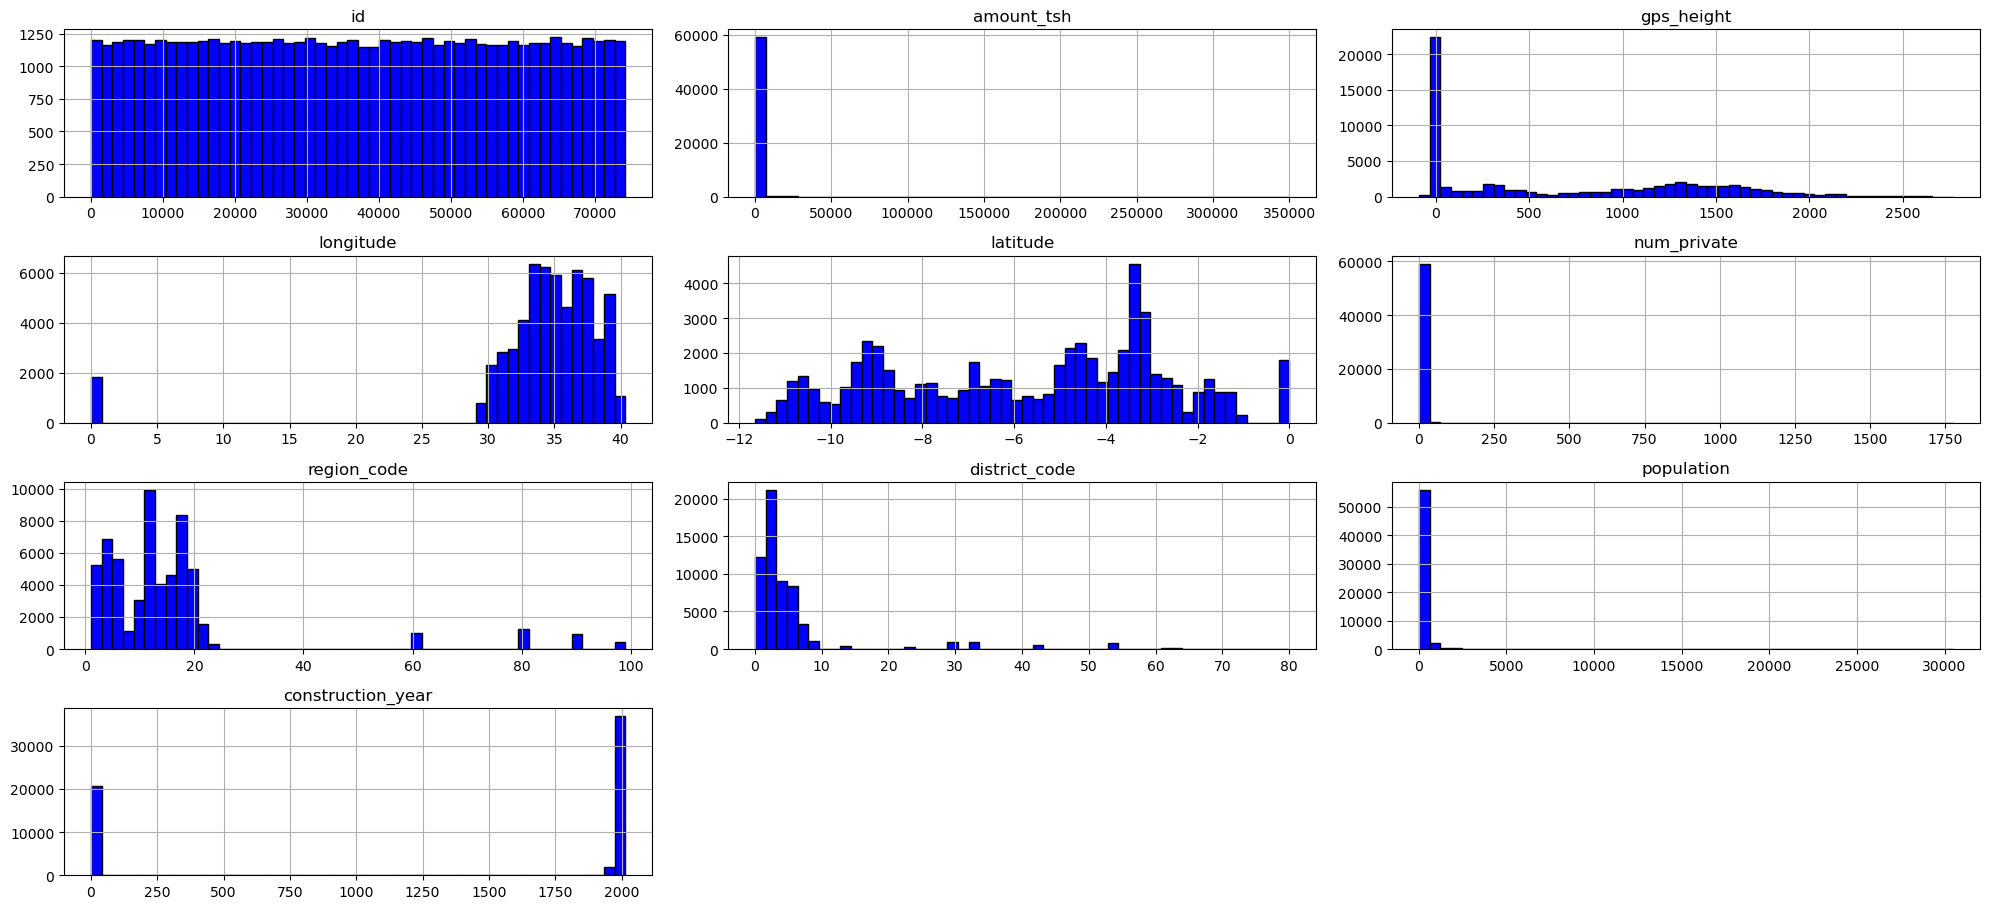

In [5]:
# Histogram Visualization
plt.figure(figsize=(20, 10))
data_train.hist(
    figsize=(20, 10), 
    bins=50, 
    xlabelsize=10, 
    ylabelsize=10, 
    color='blue',  
    edgecolor='black'  
)

# Tight layout for better spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

<Axes: xlabel='status_group', ylabel='count'>

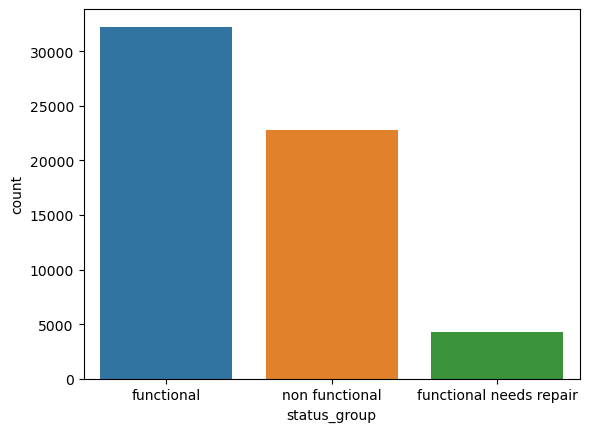

In [5]:
# Visualize functionality of pumps 
sns.countplot(data=target_train, x='status_group')

# Data Cleaning

In [6]:
# Drop unnecessary columns
columns_to_drop = [
    'id',                
    'wpt_name',          
    'num_private',       
    'recorded_by',       
    'funder',
    'installer',
    'scheme_name',
    'quantity', 
    'quality_group',
    'management',
]

# Drop columns from training data
data_train = data_train.drop(columns=columns_to_drop)

# Drop columns from test data (excluding 'id')
columns_to_drop_test = [col for col in columns_to_drop if col != 'id']
data_test = data_test.drop(columns=columns_to_drop_test)

In [7]:
# Apply transformations
data_train['date_recorded'] = pd.to_datetime(data_train['date_recorded'], errors='coerce')
data_test['date_recorded'] = pd.to_datetime(data_test['date_recorded'], errors='coerce')

# Add derived features
data_train['year_recorded'] = data_train['date_recorded'].dt.year
data_train['month_recorded'] = data_train['date_recorded'].dt.month
data_train['days_since_reference'] = (data_train['date_recorded'] - data_train['date_recorded'].min()).dt.days

data_test['year_recorded'] = data_test['date_recorded'].dt.year
data_test['month_recorded'] = data_test['date_recorded'].dt.month
data_test['days_since_reference'] = (data_test['date_recorded'] - data_train['date_recorded'].min()).dt.days

# Drop 'date_recorded'
data_train.drop(columns=['date_recorded'], inplace=True)
data_test.drop(columns=['date_recorded'], inplace=True)

In [8]:
#Visualize new DataSet
data_train

,amount_tsh,gps_height,longitude,latitude,basin,subvillage,region,region_code,district_code,lga,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,month_recorded,days_since_reference
0,6000.0,1390,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,...,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2011,3,3073
1,0.0,1399,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,20,2,Serengeti,...,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2013,3,3796
2,25.0,686,37.460664,-3.821329,Pangani,Majengo,Manyara,21,4,Simanjiro,...,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,2013,2,3787
3,0.0,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,...,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,2013,1,3759
4,0.0,0,31.130847,-1.825359,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,...,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,2011,7,3194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,1210,37.169807,-3.253847,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,...,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,2013,5,3854
59396,4700.0,1212,35.249991,-9.070629,Rufiji,Igumbilo,Iringa,11,4,Njombe,...,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,2011,5,3127
59397,0.0,0,34.017087,-8.750434,Rufiji,Madungulu,Mbeya,12,7,Mbarali,...,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,2011,4,3101
59398,0.0,0,35.861315,-6.378573,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,...,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,2011,3,3067


Check Correlation with status_group

In [10]:
categorical_cols = data_train.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    freq_encoding = data_train[col].value_counts(normalize=True)  
    data_train[col] = data_train[col].map(freq_encoding)  

data_train

,amount_tsh,gps_height,longitude,latitude,basin,subvillage,region,region_code,district_code,lga,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,month_recorded,days_since_reference
0,6000.0,1390,34.938093,-9.856322,0.085606,0.000102,0.089125,11,5,0.009495,...,0.558687,0.286549,0.286549,0.770943,0.480168,0.582912,0.543081,2011,3,3073
1,0.0,1399,34.698766,-2.147466,0.172525,0.000085,0.033148,20,2,0.012054,...,0.254697,0.038636,0.038636,0.224377,0.480168,0.582912,0.543081,2013,3,3796
2,25.0,686,37.460664,-3.821329,0.150505,0.008504,0.026650,21,4,0.005185,...,0.558687,0.011044,0.011044,0.224377,0.102744,0.582912,0.543081,2013,2,3787
3,0.0,263,38.486161,-11.155298,0.075640,0.000288,0.029125,90,63,0.002660,...,0.105152,0.186448,0.201162,0.770943,0.102744,0.582912,0.384242,2013,1,3759
4,0.0,0,31.130847,-1.825359,0.172525,0.000034,0.055825,18,1,0.012980,...,0.068182,0.038636,0.038636,0.224377,0.480168,0.582912,0.543081,2011,7,3194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,1210,37.169807,-3.253847,0.150505,0.000068,0.073721,3,5,0.010522,...,0.558687,0.286549,0.286549,0.770943,0.480168,0.582912,0.543081,2013,5,3854
59396,4700.0,1212,35.249991,-9.070629,0.134276,0.000237,0.089125,11,4,0.042138,...,0.558687,0.161818,0.174697,0.224377,0.480168,0.582912,0.543081,2011,5,3127
59397,0.0,0,34.017087,-8.750434,0.134276,0.000034,0.078098,12,7,0.010539,...,0.558687,0.186448,0.201162,0.770943,0.294411,0.294411,0.543081,2011,4,3101
59398,0.0,0,35.861315,-6.378573,0.134276,0.000407,0.037054,1,4,0.005842,...,0.254697,0.283232,0.283232,0.770943,0.294411,0.294411,0.543081,2011,3,3067


In [11]:
# Calculate correlations with `status_group`
correlations = data_train.corrwith(data_train['status_group'])
correlation_results = correlations.sort_values(ascending=False).reset_index()
correlation_results.columns = ['Feature', 'Correlation']

# Display the top correlated features
print("Top Positive Correlations:")
print(correlation_results.head(10)) 

print("\nTop Negative Correlations:")
print(correlation_results.tail(10))  


Top Positive Correlations:
                 Feature  Correlation
0           status_group     1.000000
1         quantity_group     0.161579
2        waterpoint_type     0.138996
3              longitude     0.092357
4                   ward     0.089514
5             gps_height     0.079446
6                 region     0.063307
7  waterpoint_type_group     0.057832
8                    lga     0.056501
9      construction_year     0.055841

Top Negative Correlations:
                 Feature  Correlation
23            subvillage    -0.016782
24         district_code    -0.018464
25     scheme_management    -0.022692
26      management_group    -0.027009
27              latitude    -0.032063
28         year_recorded    -0.046950
29  days_since_reference    -0.047378
30           region_code    -0.065228
31          payment_type    -0.105189
32               payment    -0.105189


In [12]:
features_to_drop = ['subvillage', 'district_code', 'management_group', 'payment','public_meeting','scheme_management','permit' ]
data_train = data_train.drop(columns=features_to_drop)

features_to_drop = ['subvillage', 'district_code', 'management_group', 'payment','public_meeting','scheme_management','permit' ]
data_test = data_test.drop(columns=features_to_drop)

data_train.head()

,amount_tsh,gps_height,longitude,latitude,basin,region,region_code,lga,ward,population,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,month_recorded,days_since_reference
0,6000.0,1390,34.938093,-9.856322,0.085606,0.089125,11,0.009495,0.000606,109,...,0.558687,0.286549,0.286549,0.770943,0.480168,0.582912,0.543081,2011,3,3073
1,0.0,1399,34.698766,-2.147466,0.172525,0.033148,20,0.012054,0.001195,280,...,0.254697,0.038636,0.038636,0.224377,0.480168,0.582912,0.543081,2013,3,3796
2,25.0,686,37.460664,-3.821329,0.150505,0.026650,21,0.005185,0.000168,250,...,0.558687,0.011044,0.011044,0.224377,0.102744,0.582912,0.543081,2013,2,3787
3,0.0,263,38.486161,-11.155298,0.075640,0.029125,90,0.002660,0.000539,58,...,0.105152,0.186448,0.201162,0.770943,0.102744,0.582912,0.384242,2013,1,3759
4,0.0,0,31.130847,-1.825359,0.172525,0.055825,18,0.012980,0.000219,0,...,0.068182,0.038636,0.038636,0.224377,0.480168,0.582912,0.543081,2011,7,3194


In [13]:
# Define the mapping with the exact values you expect
numeric_to_category = {
    0.54308081: 'functional',
    0.38424242: 'non functional',
    0.07267677: 'functional needs repair'
}
# Round the numeric values to match the keys in the mapping
data_train['status_group'] = data_train['status_group'].round(8)
data_train['status_group'] = data_train['status_group'].map(numeric_to_category)

data_train.head()


,amount_tsh,gps_height,longitude,latitude,basin,region,region_code,lga,ward,population,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,year_recorded,month_recorded,days_since_reference
0,6000.0,1390,34.938093,-9.856322,0.085606,0.089125,11,0.009495,0.000606,109,...,0.558687,0.286549,0.286549,0.770943,0.480168,0.582912,functional,2011,3,3073
1,0.0,1399,34.698766,-2.147466,0.172525,0.033148,20,0.012054,0.001195,280,...,0.254697,0.038636,0.038636,0.224377,0.480168,0.582912,functional,2013,3,3796
2,25.0,686,37.460664,-3.821329,0.150505,0.026650,21,0.005185,0.000168,250,...,0.558687,0.011044,0.011044,0.224377,0.102744,0.582912,functional,2013,2,3787
3,0.0,263,38.486161,-11.155298,0.075640,0.029125,90,0.002660,0.000539,58,...,0.105152,0.186448,0.201162,0.770943,0.102744,0.582912,non functional,2013,1,3759
4,0.0,0,31.130847,-1.825359,0.172525,0.055825,18,0.012980,0.000219,0,...,0.068182,0.038636,0.038636,0.224377,0.480168,0.582912,functional,2011,7,3194


# Run Model 

In [14]:

# Prepare data for training
X_train = data_train.drop(columns=['status_group'])
y_train = data_train['status_group']  

In [15]:
# Prepare the test set (ensure same columns as X_train)
X_test = data_test[X_train.columns]  
X_test

,amount_tsh,gps_height,longitude,latitude,basin,region,region_code,lga,ward,population,...,water_quality,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded,month_recorded,days_since_reference
0,0.0,1996,35.290799,-4.059696,Internal,Manyara,21,Mbulu,Bashay,321,...,soft,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,2013,2,3766
1,0.0,1569,36.656709,-3.309214,Pangani,Arusha,2,Arusha Rural,Kimnyaki,300,...,soft,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,2013,2,3766
2,0.0,1567,34.767863,-5.004344,Internal,Singida,13,Singida Rural,Puma,500,...,soft,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,2013,2,3763
3,0.0,267,38.058046,-9.418672,Ruvuma / Southern Coast,Lindi,80,Liwale,Mkutano,250,...,soft,dry,shallow well,shallow well,groundwater,other,other,2013,1,3753
4,500.0,1260,35.006123,-10.950412,Ruvuma / Southern Coast,Ruvuma,10,Mbinga,Mbinga Urban,60,...,soft,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2013,3,3817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,0.0,34,38.852669,-6.582841,Wami / Ruvu,Pwani,6,Bagamoyo,Yombo,20,...,soft,enough,river,river/lake,surface,communal standpipe,communal standpipe,2011,2,3055
14846,1000.0,0,37.451633,-5.350428,Pangani,Tanga,4,Kilindi,Mvungwe,2960,...,salty,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,2011,3,3080
14847,0.0,1476,34.739804,-4.585587,Internal,Singida,13,Singida Rural,Ughandi,200,...,soft,insufficient,dam,dam,surface,communal standpipe,communal standpipe,2013,3,3794
14848,0.0,998,35.432732,-10.584159,Lake Nyasa,Ruvuma,10,Songea Rural,Maposeni,150,...,soft,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,2013,2,3780


In [16]:
X_train

,amount_tsh,gps_height,longitude,latitude,basin,region,region_code,lga,ward,population,...,water_quality,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded,month_recorded,days_since_reference
0,6000.0,1390,34.938093,-9.856322,0.085606,0.089125,11,0.009495,0.000606,109,...,0.855522,0.558687,0.286549,0.286549,0.770943,0.480168,0.582912,2011,3,3073
1,0.0,1399,34.698766,-2.147466,0.172525,0.033148,20,0.012054,0.001195,280,...,0.855522,0.254697,0.038636,0.038636,0.224377,0.480168,0.582912,2013,3,3796
2,25.0,686,37.460664,-3.821329,0.150505,0.026650,21,0.005185,0.000168,250,...,0.855522,0.558687,0.011044,0.011044,0.224377,0.102744,0.582912,2013,2,3787
3,0.0,263,38.486161,-11.155298,0.075640,0.029125,90,0.002660,0.000539,58,...,0.855522,0.105152,0.186448,0.201162,0.770943,0.102744,0.582912,2013,1,3759
4,0.0,0,31.130847,-1.825359,0.172525,0.055825,18,0.012980,0.000219,0,...,0.855522,0.068182,0.038636,0.038636,0.224377,0.480168,0.582912,2011,7,3194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,1210,37.169807,-3.253847,0.150505,0.073721,3,0.010522,0.001953,125,...,0.855522,0.558687,0.286549,0.286549,0.770943,0.480168,0.582912,2013,5,3854
59396,4700.0,1212,35.249991,-9.070629,0.134276,0.089125,11,0.042138,0.000892,56,...,0.855522,0.558687,0.161818,0.174697,0.224377,0.480168,0.582912,2011,5,3127
59397,0.0,0,34.017087,-8.750434,0.134276,0.078098,12,0.010539,0.001481,0,...,0.003367,0.558687,0.186448,0.201162,0.770943,0.294411,0.294411,2011,4,3101
59398,0.0,0,35.861315,-6.378573,0.134276,0.037054,1,0.005842,0.000421,0,...,0.855522,0.254697,0.283232,0.283232,0.770943,0.294411,0.294411,2011,3,3067


In [18]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None] 
}

# Grid search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=1, oob_score=True, n_jobs=-1),
    param_grid=param_grid,
    cv=3,  
    scoring='accuracy',
    verbose=2
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.6s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.9s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.9s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.9s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_esti

^ Took 9 hours to run

In [17]:
# Initialize the Random Forest model with the best parameters
best_params = {
    'criterion': 'entropy',
    'max_depth': 20,
    'max_features': 'log2',
    'min_samples_leaf': 2,
    'min_samples_split': 2,
    'n_estimators': 500,
    'random_state': 1,
    'oob_score': True,
    'n_jobs': -1
}

# Define the Random Forest model
best_rf = RandomForestClassifier(**best_params)

# Perform cross-validation (using 3-fold as in GridSearchCV)
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=3, scoring='accuracy', verbose=2)

# Print each fold's accuracy
print("Cross-Validation Scores:", cv_scores)

# Print the mean accuracy across folds
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   9.0s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s remaining:    0.0s


[CV] END .................................................... total time=   6.9s
[CV] END .................................................... total time=   7.2s
Cross-Validation Scores: [0.80969697 0.81050505 0.80959596]
Mean Cross-Validation Accuracy: 0.8099


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   23.3s finished


In [18]:
categorical_cols = X_test.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    freq_encoding = X_test[col].value_counts(normalize=True)  
    X_test[col] = X_test[col].map(freq_encoding)  

C:\Users\keaau\AppData\Local\Temp\ipykernel_13184\272552324.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = X_test[col].map(freq_encoding)
C:\Users\keaau\AppData\Local\Temp\ipykernel_13184\272552324.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = X_test[col].map(freq_encoding)
C:\Users\keaau\AppData\Local\Temp\ipykernel_13184\272552324.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [21]:
# Fit the best_rf model using the training data
best_rf.fit(X_train, y_train)

# Predict status_group for the test set
predictions_RF = best_rf.predict(X_test)  # Predictions are categorical

# Create the submission DataFrame
submission_RF = pd.DataFrame({
    'id': data_test['id'],  # Replace 'id' with the actual column name if necessary
    'status_group': predictions_RF
})

# Save the submission file
submission_RF.to_csv('~/Downloads/submission_RF.csv', index=False)

print("Submission file generated in the Downloads folder: submission_RF.csv")

Submission file generated in the Downloads folder: submission_RF.csv


Score: 0.8112
Top 15 Percentile